In [54]:
import scipy.io as sio
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat(os.path.join('Data','20080516_R1.mat'),struct_as_record=False,squeeze_me=True)
i = 0 
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'datainfo', 'stimulus', 'spikes'])

In [14]:
data_2 = sio.loadmat('stimulus.mat',struct_as_record=False,squeeze_me=True)
data_2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'r'])

In [15]:
stimulus = data['stimulus']
spikes   = data['spikes']
datainfo = data['datainfo']
r = data_2['r']
{key: value for key, value in stimulus[0].__dict__.items()} #easy way to see what's inside one of our variables

{'_fieldnames': ['type', 'onset', 'frame', 'Nframes', 'pixelsize', 'param'],
 'type': 'binarywhitenoise',
 'onset': 1.2375,
 'frame': 0.016671788281371697,
 'Nframes': 89899,
 'pixelsize': 8.3,
 'param': <scipy.io.matlab.mio5_params.mat_struct at 0x1bb7ed4eba8>}

In [4]:
time = np.arange(0,stimulus[i].Nframes) * stimulus[i].frame + stimulus[i].onset
N = len(time)-1

In [83]:
spikes_frames = np.round((spikes[0][0] - stimulus[0].onset) / stimulus[0].frame).astype(int)
spikes_frames

array([  -73,   -72,   -69, ..., 89894, 89895, 89897])

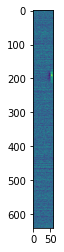

In [84]:
counter = 0
result = np.array([[0 for i in range(60)] for j in range(640)])
for spike in spikes_frames:
    if spike > 60: 
        result += r[:, spike-60:spike]
        counter += 1
print()
plt.imshow(result / counter)